# Proses Training Dataset Colorful

### Importing Library

In [1]:
import os
import csv
import numpy as np

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib import pyplot as plt
import pandas as pd

### Load Data fitur From CSV

In [154]:
df = pd.read_csv('data/dataset_color.csv')
fitur = []
for i in range(len(df['fitur0'])):
    temp = []
    for i in range(20):
        temp.append(df['fitur'+str(i)][i])
    fitur.append(temp)
fitur = np.array(fitur)
target = np.array([k for k in df['kelas']])

## Adaboost Classification

In [155]:
num_feature = len(fitur[0])
m = len(target)
T = 10

### Function Step Adaboost

In [22]:
def weight_error_predictor(w, y_pred, y_target):
    sumNot = 0
    for i in range(m):
        if y_pred[i] != y_target[i]:
            sumNot += w[i]
    return sumNot/w.sum()
      

In [23]:
def weight_predictor(rj, lrate=1):
    '''
    Semakin besar weighted error akan membuat bobot predictor semakin 
    rendah, dan sebaliknya.
    Bobot ini digunakan untuk update bobot tiap data pada dataset, 
    dan prediksi akhir (final aggregation)
    '''
    # np.log is ln, whereas np.log10 is your standard base 10 log.
    return lrate * np.log((1-rj)/rj)
    

In [46]:
def update_weight_predictor(w, a, y_pred, y_target):
    new_w = np.zeros(w.shape)
    for i in range(m):
        err = 0 if y_pred[i] == y_target[i] else 1
        new_w[i] = w[i] * np.exp(a*err)
    return new_w
        

### Train

In [181]:
# Membuat np array bobot awal
w = np.array([1/m for _ in range(m)])

# Membuat array bobot predictor dengan ukuran iterasi x jumlah fitur
a = np.zeros(shape=T)

# Membuat array untuk weak learner
wl = np.zeros(shape=T, dtype=object)

for t in range(T):
    # Weak Learner
    #weak_learn = LogisticRegression(random_state=0)
    weak_learn = DecisionTreeClassifier(max_depth=1)
    # Weak Learner Train
    weak_learn = weak_learn.fit(fitur, target, sample_weight=w)
    
    # weighted error dari Predictor ke-j
    y_pred = weak_learn.predict(fitur)
    rj = weight_error_predictor(w, y_pred, target)
    
    # Bobot Predictor
    aj = weight_predictor(rj, lrate=1)
    a[t] = aj
    
    # Update weight dataset
    w = update_weight_predictor(w, aj, y_pred, target)
    
    # Menambhakan weak learner ke array
    wl[t] = weak_learn 
    

### Prediksi Function

In [176]:
def predict(fitur, a, weak_learn):
    # Mendapatkan hipotesis dari weak learn
    y_pred = np.array([wl.predict(fitur) for wl in weak_learn], dtype=int)
    # Hasil Prediksi
    return np.sign(np.dot(a, y_pred))[0]
        

### Testing Data

In [177]:
# Membuat tapungan
prediksi = np.zeros(shape=m)

for i in range(m):
    pr = predict([fitur[i]], a, wl)
    prediksi[i] = pr


In [178]:
print(prediksi)
print(target)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[ 1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1

### Confusion Matrix

[[111  65]
 [  0   0]]


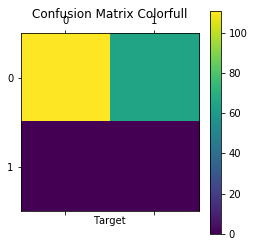

In [179]:
cm = confusion_matrix(prediksi, target)
print(cm)
plt.matshow(cm)
plt.title("Confusion Matrix Colorfull")
plt.xlabel("Prediksi")
plt.xlabel("Target")
cb = plt.colorbar()

In [180]:
print("F1-skor Keseluruhan")
precision = precision_score(target, prediksi)
recall = recall_score(target, prediksi)
print("Precisision = ", precision)
print("Recall      = ", recall)

F1-skor Keseluruhan
Precisision =  0.0
Recall      =  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [173]:
c = 0
for i in range(m):
    if prediksi[i] == target[i]:
        c += 1
print(c/m)

0.6306818181818182
